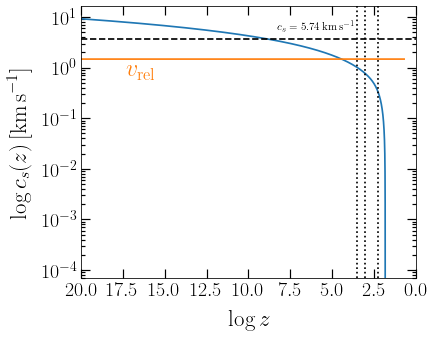

In [1]:
from scipy.integrate import quad
import numpy as np
from scipy.integrate import odeint
from matplotlib import rcParams
import matplotlib.pyplot as plt
from matplotlib import rcParams
import scipy.integrate as spi
from scipy.integrate import solve_ivp
from scipy import integrate
import matplotlib.ticker
from accretion import*
import math
plt.rcParams.update({
  "text.usetex": True,
  "font.family": "serif"
})


def c_s(z):
    β = 1.72
    z_dec = 130
    return  5.74e3 * np.sqrt((1+z)/1000) * (((((1+z_dec)/(1 + z))**β) + 1)**(-1/(2 * β))) * (yr/pc)

def v_rel(z):
    return   np.minimum(1, (1+z/1000)) * (30e3 *(yr/pc))



colors = ['C0', 'C1','C2','C3','C4', 'C5']
fig,ax = plt.subplots(1, figsize = (6, 5))
plt.rc('lines', linewidth = 1.7)
plt.rcParams['font.family'] = 'serif'
plt.tick_params(axis = 'both', right=True, top=True, which = 'minor', width= 1.2, length = 4, direction = 'in')
plt.tick_params(axis = 'both', right=True, top=True, which = 'major', width= 1.2, length = 9, direction = 'in')



z_arr = np.geomspace(1e20, 5, 100000)
c_s_arr = np.zeros(len(z_arr))
v_rel_arr = np.zeros(len(z_arr))
for i, z in enumerate(z_arr):
    c_s_arr[i] = c_s(z) * (pc/yr) * (1e-3)
    v_rel_arr[i] = v_rel(z) * (pc/yr) * (1e-3)
    
    
    
ax.plot(np.log10(z_arr), np.log10(c_s_arr), 'C0')
ax.plot(np.log10(z_arr), np.log10(v_rel_arr), 'C1')

plt.text(8.3, 5.7, '$c_{s} = 5.74\, \mathrm{km \,s^{-1}}$', fontsize = 11, color = 'k')
plt.text(17.3, 0.7, '$v_\mathrm{rel}$', fontsize = 24, color = 'C1')
 

   
plt.axhline(y = np.log10(5.74e3),  color = 'k',  linestyle = '--')
plt.axvline(x = np.log10(z_th),  color = 'k',  linestyle = ':')
plt.axvline(x = np.log10(z_rec),  color = 'k',  linestyle = ':')
plt.axvline(x = np.log10(z_eq),  color = 'k',  linestyle = ':')



plt.xlim(20, 0)
plt.yscale('log')
plt.xlabel(' $\mathrm{log}\,z$',  fontsize = 23, labelpad = 10)
plt.ylabel(' $\mathrm{log}\, c_{s}(z)\, \mathrm{[km \,s^{-1}}]$', fontsize = 23, labelpad = 10)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.savefig('c_s.pdf', bbox_inches = 'tight')
plt.show()

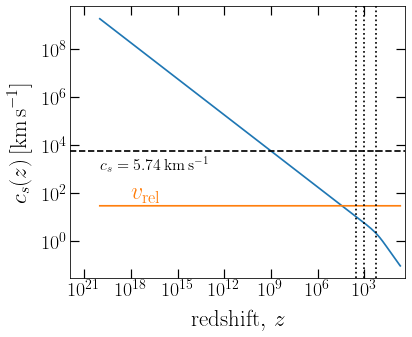

In [2]:
colors = ['C0', 'C1','C2','C3','C4', 'C5']
fig,ax = plt.subplots(1, figsize = (6, 5))
plt.rc('lines', linewidth = 1.7)
plt.rcParams['font.family'] = 'serif'
plt.tick_params(axis = 'both', right=True, top=True, which = 'minor', width= 1.2, length = 4, direction = 'in')
plt.tick_params(axis = 'both', right=True, top=True, which = 'major', width= 1.2, length = 9, direction = 'in')

z_cut = 5
z_arr = np.geomspace(1e20, z_cut, 100000)
c_s_arr = np.zeros(len(z_arr))
v_rel_arr = np.zeros(len(z_arr))
for i, z in enumerate(z_arr):
    c_s_arr[i] = c_s(z) * (pc/yr) * (1e-3)
    v_rel_arr[i] = v_rel(z) * (pc/yr) * (1e-3)
    
    
ax.loglog(z_arr, c_s_arr, 'C0')
ax.loglog(z_arr, v_rel_arr, 'C1')
plt.axhline(y = 5.74e3,  color = 'k',  linestyle = '--')
plt.axvline(x = z_th,  color = 'k',  linestyle = ':')
plt.axvline(x = z_rec,  color = 'k',  linestyle = ':')
plt.axvline(x = z_eq,  color = 'k',  linestyle = ':')


plt.text(1e20, 1e3, '$c_{s} = 5.74\, \mathrm{km \,s^{-1}}$', fontsize = 16, color = 'k')
plt.text(1e18, 60, '$v_\mathrm{rel}$', fontsize = 24, color = 'C1')
 


plt.xlim(8e21, 0.5*z_cut)
plt.yscale('log')
plt.xlabel(' redshift$,\,z$',  fontsize = 23, labelpad = 10)
plt.ylabel(' $c_{s}(z)\, \mathrm{[km \,s^{-1}}]$', fontsize = 23, labelpad = 10)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.savefig('c_s.pdf', bbox_inches = 'tight')
plt.show()

In [8]:
def λ(z):
    
    def v_eff(z):    #with the approximation of either v_rel = 0 or v_rel << c_s(z)
        β = 1.72
        z_dec = 130
        return 5.74e3 * np.sqrt((1+z)/1000) * (((((1+z_dec)/(1 + z))**β) + 1)**(-1/(2 * β))) * (yr/pc)
    
   
    def β_cap(z):
        x_e = 1e-3
        return 1e-4 * m * (((1+z)/1000)**(3/2)) *  ((5.74e3 * (yr/pc)/v_eff(z))**3)  *  [0.257 + 1.45 * (x_e/0.01) * (((1+z)/1000)**(5/2))]
    
    
    def x_cr(z):
        return (-1 + np.sqrt(1 + β_cap(z)))/β_cap(z)
    
    return np.exp((9/2)/ (3 + β_cap(z)*(3/4))) * (x_cr(z)**2)



m = 1 #in units of M_solar
z_cut = 5
z_arr = np.geomspace(1e20, z_cut, 100000)
z_list = z_arr.tolist()
λ_list = np.zeros(len(z_list))

for i, z in enumerate(z_arr):
    λ_list[i] = λ(z)
   
  
    
    
plt.loglog(z_list, λ_list, 'C0')
plt.show()

TypeError: can't multiply sequence by non-int of type 'numpy.float64'

In [ ]:
def λ(z, m):
    
    y = np.array(m, dtype = np.longdouble)
    
    if v_relative == 0:
        def v_eff(z):    #with the approximation of either v_rel = 0 or v_rel << c_s(z)
            β = 1.72
            z_dec = 130
            return 5.74e3 * np.sqrt((1+z)/1000) * (((((1+z_dec)/(1 + z))**β) + 1)**(-1/(2 * β))) * (yr/pc)
    
    elif v_relative == speed_of_sound:
         def v_eff(z):    #with the approximation of v_rel = c_s(z)
            β = 1.72
            z_dec = 130
            return np.sqrt(2) * 5.74e3 * np.sqrt((1+z)/1000) * (((((1+z_dec)/(1 + z))**β) + 1)**(-1/(2 * β))) * (yr/pc)
    
    else:
        def v_eff(z):    #with v_rel given by Eq.(7) of https://arxiv.org/pdf/1707.04206.pdf
            def c_s(z):
                β = 1.72
                z_dec = 130
                return  5.74e3 * np.sqrt((1+z)/1000) * (((((1+z_dec)/(1 + z))**β) + 1)**(-1/(2 * β))) * (yr/pc)
            def v_rel(z):
                return  5.74e3 * (yr/pc) * np.minimum(1, (1+z/1000)) * (30e3/5.74e3)
            return np.sqrt(v_rel(z)**2 + c_s(z)**2)

    def β_cap(z, m):
        x_e = 1e-3
        return 1e-4 * y * (((1+z)/1000)**(3/2)) *  ((5.74e3 * (yr/pc)/v_eff(z))**3) * [0.257 + 1.45 * (x_e/0.01) * (((1+z)/1000)**(5/2))]
    
    def x_cr(z, m):
        return (-1 + np.sqrt(1 + β_cap(z, m)))/β_cap(z, m)
    
    return np.exp((9/2)/ (3 + β_cap(z, m)*(3/4))) * (x_cr(z, m)**2)



m = 1e5 #in units of M_solar
z_cut = 5
z_arr = np.geomspace(1e20, z_cut, 100000)
λ_arr1 = np.zeros(len(z_arr))
λ_arr2 = np.zeros(len(z_arr))
λ_arr3 = np.zeros(len(z_arr))

for i, z in enumerate(z_arr):
    v_relative = 0
    λ_arr1[i] = λ(z, m)
    speed_of_sound = True
    v_relative =speed_of_sound
    λ_arr2[i] = λ(z, m)
    speed_of_sound != True
    v_relative =speed_of_sound
    λ_arr3[i] = λ(z, m)
    
    
ax.loglog(z_arr, λ_arr1, 'C0')
ax.loglog(z_arr, λ_arr2, 'C1')
ax.loglog(z_arr, λ_arr3, 'C2')